In [33]:
import geopandas
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

In [13]:
user = os.getenv("POSTGRES_USER")
password = os.getenv("POSTGRES_PASS")
host = os.getenv("POSTGRES_HOST")
db = os.getenv("POSTGRES_DB")
port = os.getenv("POSTGRES_PORT")
engine = create_engine(
    f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}"
)


In [29]:
map_comuna = geopandas.read_postgis("""
WITH TBL_NUM_HOM AS (
    SELECT "COMUNA_KEY", COUNT(*) AS NUM_HOMICIDIOS
    FROM star.fact_kill
    GROUP BY "COMUNA_KEY"
)
SELECT a."COMUNA_KEY", "CODIGO", "NOMBRE", "IDENTIFICACION"
    , "SUBTIPO_COMUNACORREGIMIENTO", "SHAPE.AREA", "SHAPE.LEN", geometry as geom
    , b.NUM_HOMICIDIOS AS num_kills
FROM star.dim_comuna a
LEFT JOIN TBL_NUM_HOM b
ON b."COMUNA_KEY" = a."COMUNA_KEY";
""" , engine)

In [31]:
map_comuna.head(2)

,COMUNA_KEY,CODIGO,NOMBRE,IDENTIFICACION,SUBTIPO_COMUNACORREGIMIENTO,SHAPE.AREA,SHAPE.LEN,geom,num_kills
0,1,01,Popular,Comuna 1,1,3.098286e+06,9604.982975,"POLYGON ((-75.54803 6.30436, -75.54795 6.30431...",768
1,2,02,Santa Cruz,Comuna 2,1,2.195872e+06,8597.709005,"POLYGON ((-75.55703 6.31007, -75.55699 6.31003...",601


<AxesSubplot:title={'center':'Number of kills by comuna in Medellín, Colombia'}, xlabel='Longitud', ylabel='Latitud'>

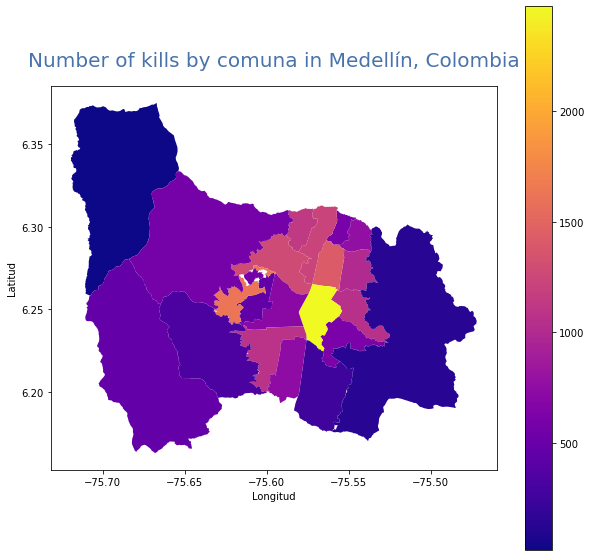

In [37]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Number of kills by comuna in Medellín, Colombia', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
map_comuna.plot(column='num_kills', cmap='plasma', ax=ax, zorder=5, legend=True)